In [1]:
# Author: Yilin ZHENG
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from numpy.matlib import repmat
from scipy import ndimage
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


1. Image segmentation

In [2]:
# load image
image_path = "./city.jpg"
image = cv2.imread(image_path)
# Referenced from https://github.com/FilippoGrazioli/KMeansClustering
def k_means(image, cluster_num, verbose=False):
    samples, dim = image.shape
    centers = image[np.random.choice(range(samples), size=cluster_num)]
    old_labels = np.zeros(shape=cluster_num)
    while True:
        distances = np.zeros((samples, cluster_num))
        for cluster_idx, cluster in enumerate(centers):
            distances[:, cluster_idx] = np.sum(np.square(image - repmat(cluster, samples, 1)), axis=1)
        new_labels = np.argmin(distances, axis=1)
        for l in range(0, cluster_num):
            centers[l] = np.mean(image[new_labels==l], axis=0)
        if verbose:
            fig, ax = plt.subplots()
            ax.scatter(image[:, 0], image[:, 1], cluster=new_labels, s=40)
            ax.plot(centers[:, 0], centers[:, 1], 'r*', markersize=20)
            plt.waitforbuttonpress()
            plt.close()
        if np.all(new_labels == old_labels):
            break
        old_labels = new_labels
    return new_labels

def image_segmentation(image_path, cluster_num):
    image = np.float32(cv2.imread(image_path))
    h, w, c = image.shape
    row_indexes = np.arange(0, h)
    col_indexes = np.arange(0, w)
    coordinates = np.zeros(shape=(h, w, 2))
    coordinates[..., 0] = normalize(repmat(row_indexes, w, 1).T)
    coordinates[..., 1] = normalize(repmat(col_indexes, h, 1))
    data = np.concatenate((image, coordinates), axis=-1)
    data = np.reshape(data, newshape=(w * h, 5))
    labels = k_means(data, cluster_num=cluster_num)
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.uint8))
    ax[0].axis('off')
    ax[1].imshow(np.reshape(labels, (h, w)), cmap="hsv")
    ax[1].axis('off')
    plt.savefig("segmentation_city.jpg")
    plt.show()
 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


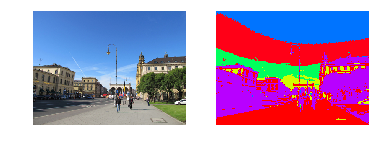

In [3]:
image_segmentation(image_path, 6)

3. GMM

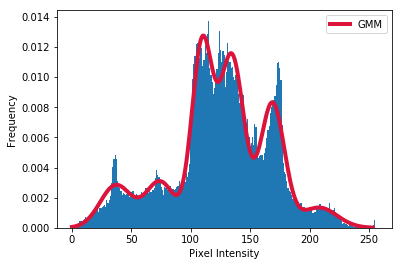

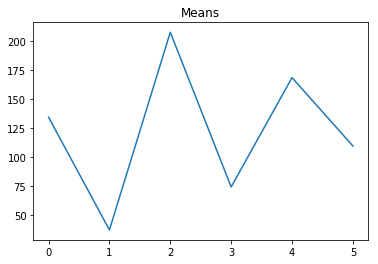

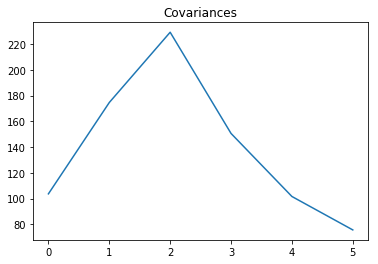

In [4]:
# Read image
img = cv2.imread("./city.jpg", 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist[0] = 0     # Removes background pixels

data = img.ravel()
data = data[data != 0]
data = data[data != 1]  #Removes background pixels (intensities 0 and 1)

# Fit GMM
gmm = GaussianMixture(n_components = 6)
gmm = gmm.fit(X=np.expand_dims(data,1))

# Evaluate GMM
gmm_x = np.linspace(0,253,256)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))

# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(img.ravel(), 255, [2,256], density=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")
ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")
plt.legend()
plt.savefig("GMM_city.jpg")
plt.show()

# Estimation
plt.title("Means")
plt.plot(gmm.means_, '-')
plt.show()
plt.title("Covariances")
plt.plot(gmm.covariances_.flatten(), '-')
plt.show()

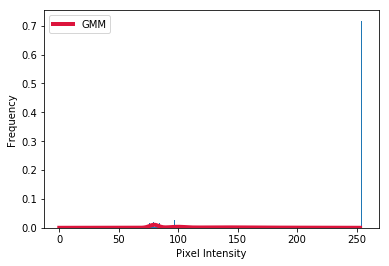

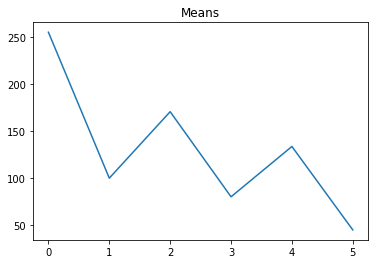

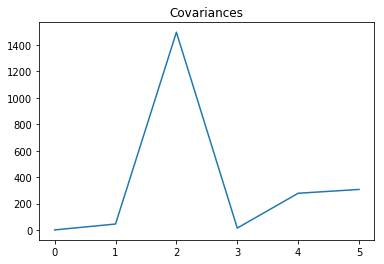

In [5]:
img = cv2.imread("./segmentation_city.jpg", 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist[0] = 0     # Removes background pixels

data = img.ravel()
data = data[data != 0]
data = data[data != 1]  #Removes background pixels (intensities 0 and 1)

# Fit GMM
gmm = GaussianMixture(n_components = 6)
gmm = gmm.fit(X=np.expand_dims(data,1))
# Evaluate GMM
gmm_x = np.linspace(0,253,256)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))

# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(img.ravel(), 255, [2,256], density=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")
ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")
plt.legend()
plt.savefig("GMM_segmentation_city.jpg")
plt.show()

# Estimation
plt.title("Means")
plt.plot(gmm.means_, '-')
plt.show()
plt.title("Covariances")
plt.plot(gmm.covariances_.flatten(), '-')
plt.show()